# MACHINE LEARNING: BÀI THỰC HÀNH SỐ 4 – PHẦN 1.
# PHÂN TÍCH THÀNH PHẦN CHÍNH (PRINCIPAL COMPONENTS ANALYSIS - PCA)

In [122]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import time
import gzip

# Ví dụ 1.

In [123]:
column_names = ["sepal.length", "sepal.width", "petal.length", "petal.width", "variety"]
df = pd.read_csv("D:\\Hoc may\\Bài thực hành 4\\iris.data", names=column_names)
df
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [119]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


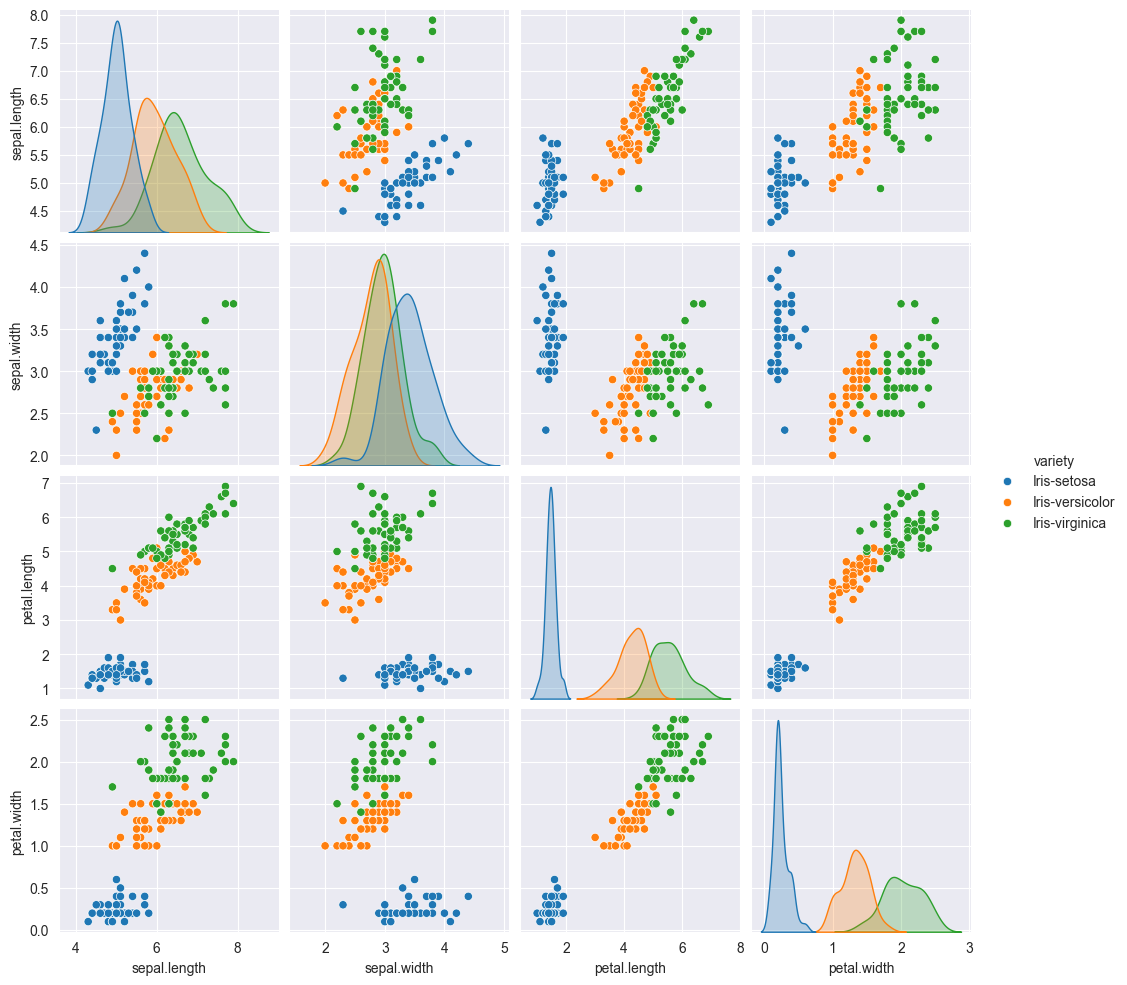

In [120]:
sns.pairplot(df, hue = 'variety')

Text(0.5, 1.0, 'Correlation matrix')

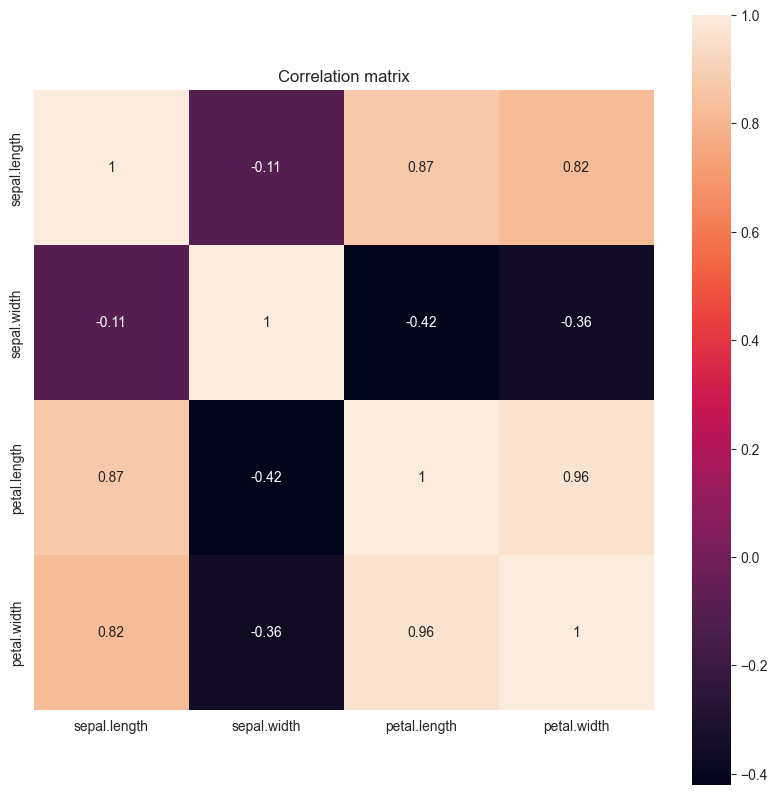

In [124]:
species = df["variety"].tolist()
X = df.drop("variety", axis=1)
# Standardize the data
X = (X - X.mean()) / X.std(ddof=0)
# Calculating the correlation matrix of the data
X_corr = (1 / 150) * X.T.dot(X)
# Plotting the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(X_corr, vmax=1, square=True,annot=True)
plt.title('Correlation matrix')

In [125]:
# method1
u,s,v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s, u
eig_values, eig_vectors
# method2
np.linalg.eig(X_corr)

EigResult(eigenvalues=array([2.91081808, 0.92122093, 0.14735328, 0.02060771]), eigenvectors=array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]]))

Text(0.5, 0, 'Dimensions')

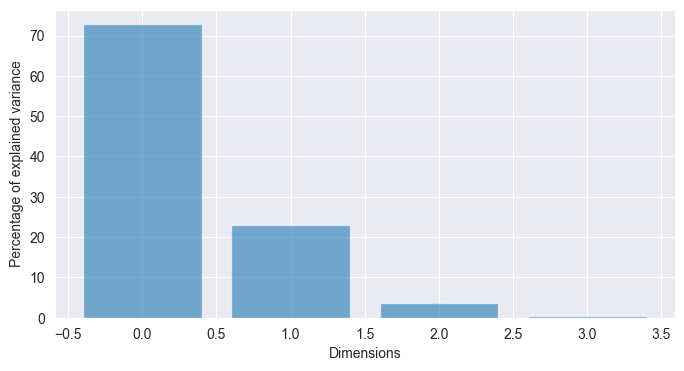

In [126]:
# plotting the variance explained by each PC
explained_variance=(eig_values / np.sum(eig_values))*100
plt.figure(figsize=(8,4))
plt.bar(range(4), explained_variance, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

In [127]:
# calculating our new axis
pc1 = X.dot(eig_vectors[:,0])
pc2 = X.dot(eig_vectors[:,1])

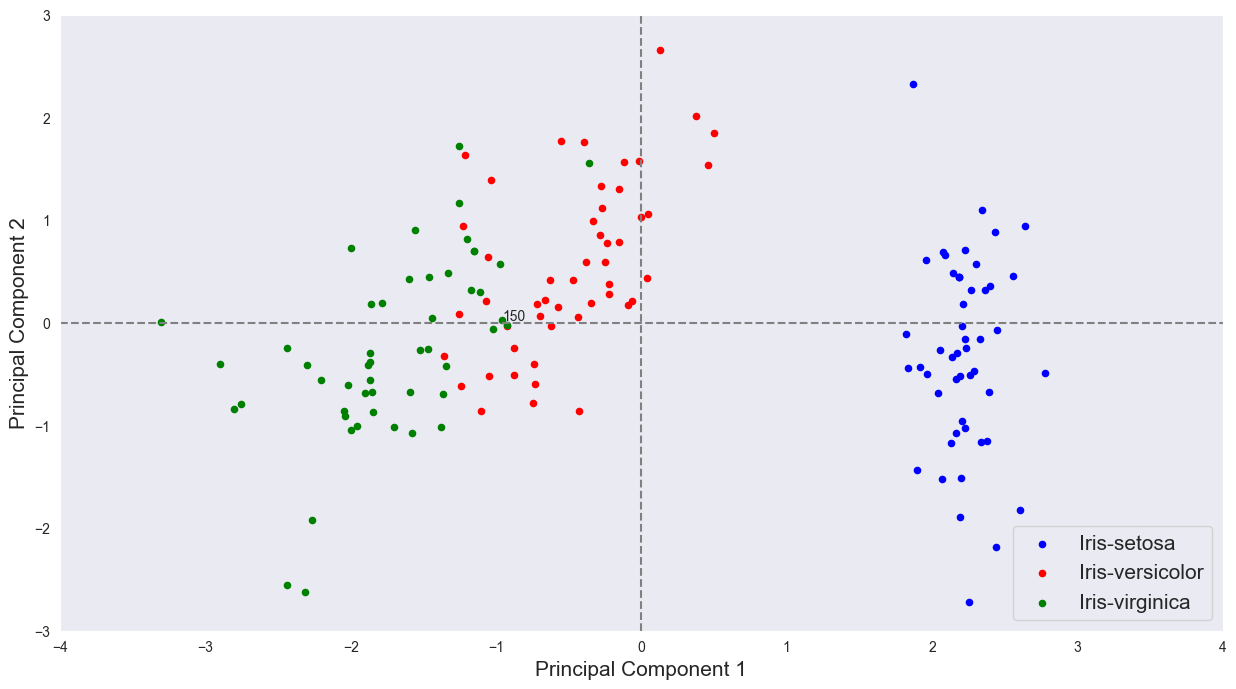

In [128]:
# plotting in 2D
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize=(15, 8))
    species_unique = list(set(species))
    species_colors = ["r","b","g"]
    for i, spec in enumerate(species):
        plt.scatter(pc1[i], pc2[i], label = spec, s = 20,
c=species_colors[species_unique.index(spec)])
    ax.annotate(str(i+1), (pc1[i],pc2[i]))
    from collections import OrderedDict
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")
    plt.grid()
    plt.axis([-4, 4, -3, 3])
    plt.show()
plot_scatter(pc1, pc2)

In [138]:
# Logistic Regression với dữ liệu nguyên bản
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
# Chia dữ liệu Train:Test = 4:1
X_train, X_test, y_train, y_test = train_test_split(X, species, test_size=0.2, stratify=species, random_state=42)

# Huấn luyện Logistic Regression
model_original = LogisticRegression(max_iter=5000)
model_original.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred_original = model_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
conf_matrix_original = confusion_matrix(y_test, y_pred_original)

print(f"Độ chính xác (nguyên bản): {accuracy_original:.4f}")
print("Ma trận nhầm lẫn (nguyên bản):\n", conf_matrix_original)


Độ chính xác (nguyên bản): 0.9333
Ma trận nhầm lẫn (nguyên bản):
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


In [136]:
# Chia dữ liệu trước rồi giảm chiều
# Chia dữ liệu Train:Test = 4:1
X_train, X_test, y_train, y_test = train_test_split(X, species, test_size=0.2, stratify=species, random_state=42)

# Giảm chiều dữ liệu với PCA
pca_split = PCA(n_components=2)
X_train_pca = pca_split.fit_transform(X_train)
X_test_pca = pca_split.transform(X_test)

# Huấn luyện Logistic Regression trên dữ liệu giảm chiều
model_pca_split = LogisticRegression(max_iter=5000)
model_pca_split.fit(X_train_pca, y_train)

# Dự đoán và đánh giá
y_pred_pca_split = model_pca_split.predict(X_test_pca)
accuracy_pca_split = accuracy_score(y_test, y_pred_pca_split)
conf_matrix_pca_split = confusion_matrix(y_test, y_pred_pca_split)

print(f"Độ chính xác (giảm chiều sau chia): {accuracy_pca_split:.4f}")
print("Ma trận nhầm lẫn (giảm chiều sau chia):\n", conf_matrix_pca_split)


Độ chính xác (giảm chiều sau chia): 0.9000
Ma trận nhầm lẫn (giảm chiều sau chia):
 [[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]


In [135]:
#Giảm chiều trên toàn bộ dữ liệu trước khi chia
# Giảm chiều dữ liệu với PCA
pca_full = PCA(n_components=2)
X_pca_full = pca_full.fit_transform(X)

# Chia dữ liệu Train:Test = 4:1
X_train, X_test, y_train, y_test = train_test_split(X_pca_full, species, test_size=0.2, stratify=species, random_state=42)

# Huấn luyện Logistic Regression trên dữ liệu giảm chiều
model_pca_full = LogisticRegression(max_iter=5000)
model_pca_full.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred_pca_full = model_pca_full.predict(X_test)
accuracy_pca_full = accuracy_score(y_test, y_pred_pca_full)
conf_matrix_pca_full = confusion_matrix(y_test, y_pred_pca_full)

print(f"Độ chính xác (giảm chiều trước chia): {accuracy_pca_full:.4f}")
print("Ma trận nhầm lẫn (giảm chiều trước chia):\n", conf_matrix_pca_full)


Độ chính xác (giảm chiều trước chia): 0.9000
Ma trận nhầm lẫn (giảm chiều trước chia):
 [[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]


#### hai kết quả nhận được (giữa hai cách giảm chiều) giống hệt nhau, điều này chỉ ra rằng quá trình giảm chiều hoặc mô hình phân loại không bị ảnh hưởng đáng kể bởi quy trình giảm chiều trước hay sau khi chia dữ liệu

# Ví dụ 2 (Bài tập thực hành 1).

In [40]:
df = pd.read_csv("D:\\Hoc may\\Thuc hanh 5\\pd_speech_features.csv")
df.drop("id",axis=1,inplace=True)
df.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [41]:
df['class'].value_counts()

class
1    564
0    192
Name: count, dtype: int64

In [42]:
species = df["class"].tolist()
X = df.drop("class", axis=1)
y = df['class']
# Standardize the data
X = (X - X.mean()) / X.std(ddof=0)
# Calculating the correlation matrix of the data
X_corr = (1 / X.shape[0]) * X.T.dot(X)



In [43]:
u, s, v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s, u
# method2
np.linalg.eig(X_corr)

EigResult(eigenvalues=array([9.76038437e+01, 7.07070490e+01, 6.21415054e+01, 3.23049351e+01,
       2.68552344e+01, 2.25532559e+01, 1.89023580e+01, 1.66760182e+01,
       1.53251045e+01, 1.37338895e+01, 1.33062747e+01, 1.12591880e+01,
       9.84066800e+00, 9.58492728e+00, 9.54573544e+00, 8.79241443e+00,
       8.04348189e+00, 7.96950444e+00, 7.15109587e+00, 7.04439416e+00,
       6.52962430e+00, 6.07154315e+00, 5.74429728e+00, 5.56841075e+00,
       5.02995803e+00, 4.72722627e+00, 4.69744036e+00, 4.58252318e+00,
       4.41714682e+00, 4.20971410e+00, 3.96849017e+00, 3.91832732e+00,
       3.75857370e+00, 3.62916168e+00, 3.53766212e+00, 3.44523551e+00,
       3.32601308e+00, 3.13212462e+00, 3.02511775e+00, 2.86875990e+00,
       2.84021407e+00, 2.77412467e+00, 2.71472228e+00, 2.35175566e+00,
       2.37213487e+00, 2.64150148e+00, 2.59939414e+00, 2.57229708e+00,
       2.53095074e+00, 2.30134613e+00, 2.23000437e+00, 2.24885526e+00,
       2.19529969e+00, 2.14480280e+00, 2.13069105e+00, 

In [44]:
# calculating our new axis
pc1 = X.dot(eig_vectors[:,0])
pc2 = X.dot(eig_vectors[:,1])
print(pc1,pc2)

0     -10.034309
1     -10.624667
2     -13.503155
3      -9.143503
4      -6.752753
         ...    
751    22.310813
752    13.430631
753     8.257256
754     3.998611
755     3.980102
Length: 756, dtype: float64 0     -1.473186
1     -1.585847
2      1.251541
3     -8.834664
4     -4.612583
         ...   
751   -6.480637
752   -1.447522
753   -2.389440
754   -5.410284
755   -6.070525
Length: 756, dtype: float64


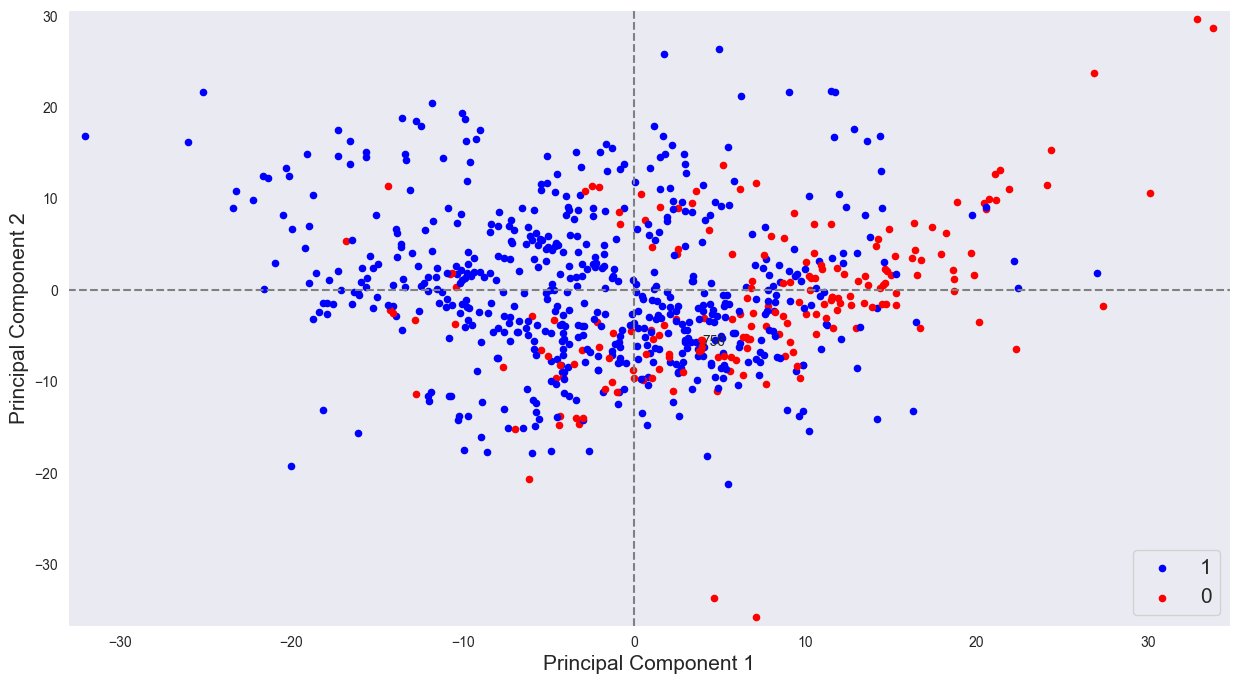

In [45]:
# plotting in 2D
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize=(15, 8))
    species_unique = list(set(species))
    species_colors = ["r","b","g"]
    for i, spec in enumerate(species):
        plt.scatter(pc1[i], pc2[i], label = spec, s = 20,
c=species_colors[species_unique.index(spec)])
    ax.annotate(str(i+1), (pc1[i],pc2[i]))
    from collections import OrderedDict
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")
    plt.grid()
    plt.axis([pc1.min() - 1, pc1.max() + 1, pc2.min() - 1, pc2.max() + 1])
    plt.show()
plot_scatter(pc1, pc2)


## Kết quả hiển thị giúp quan sát phân phối dữ liệu trong không gian 2 chiều, đồng thời thấy rõ sự tách biệt giữa hai lớp (0 và 1). Nếu các cụm dữ liệu không tách biệt rõ ràng, điều này có thể chỉ ra rằng dữ liệu cần thêm các biến bổ sung để phân biệt tốt hơn.

## Việc giảm chiều xuống 2 có thể gây mất mát thông tin quan trọng, nhưng rất hữu ích để trực quan hóa dữ liệu


In [46]:

# Giảm chiều xuống 200 bằng PCA
pca_200 = PCA(n_components=200)
X_pca_200 = pca_200.fit_transform(X)

# Chia dữ liệu thành train và test
scaler = StandardScaler()

X_train = X_pca_200[:500]
X_test = X_pca_200[500:]
y_train = y[:500]
y_test = y[500:]


# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Độ chính xác
accuracy_200 = accuracy_score(y_test, y_pred)
print("Độ chính xác với PCA 200 chiều:", accuracy_200)

Độ chính xác với PCA 200 chiều: 0.796875


## PCA giúp giảm số chiều từ 754 xuống còn 200, giữ lại thông tin quan trọng đồng thời giảm nhiễu trong dữ liệu.

## Logistic Regression thường hoạt động tốt hơn trên dữ liệu đã giảm chiều vì nó loại bỏ các thành phần không liên quan.
## Độ chính xác ở đây sẽ cao hơn so với khi sử dụng dữ liệu gốc vì mô hình Logistic Regression tránh được overfitting do giảm chiều dữ liệu.


In [47]:
# PCA trước khi chia dữ liệu (200 chiều)
pca_full = PCA(n_components=200)
X_full_pca = pca_full.fit_transform(X)

# Chia dữ liệu train/test (tương tự yêu cầu 2)
X_train_full = X_full_pca[:500]
X_test_full = X_full_pca[500:]
y_train_full = y[:500]
y_test_full = y[500:]

# Logistic Regression
logreg.fit(X_train_full, y_train_full)
y_pred_full = logreg.predict(X_test_full)

# Độ chính xác
accuracy_full = accuracy_score(y_test_full, y_pred_full)
print("Độ chính xác với PCA toàn bộ (200 chiều):", accuracy_full)

# So sánh độ chính xác giữa hai cách
print("So sánh độ chính xác giữa yêu cầu 2 và 3:")
print(f"Yêu cầu 2: {accuracy_200}, Yêu cầu 3: {accuracy_full}")


Độ chính xác với PCA toàn bộ (200 chiều): 0.796875
So sánh độ chính xác giữa yêu cầu 2 và 3:
Yêu cầu 2: 0.796875, Yêu cầu 3: 0.796875


## Thực hiện PCA trước khi chia dữ liệu có thể gây rò rỉ thông tin (data leakage), vì việc tính toán các thành phần chính trên toàn bộ dữ liệu làm lộ một phần thông tin từ tập kiểm tra cho mô hình.

## Độ chính xác ở bước này thường cao hơn yêu cầu 2, nhưng không phản ánh đúng khả năng khái quát hóa của mô hình.

In [48]:
# PCA giữ lại 80% thông tin
pca_80 = PCA(n_components=0.8)
X_pca_80 = pca_80.fit_transform(X)

# Kiểm tra số chiều giữ lại
print("Số chiều giữ lại để đạt 80% thông tin:", X_pca_80.shape[1])

# Chia dữ liệu train/test
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X_pca_80, y, test_size=0.5, random_state=42)

# Logistic Regression
logreg.fit(X_train_80, y_train_80)
y_pred_80 = logreg.predict(X_test_80)

# Độ chính xác
accuracy_80 = accuracy_score(y_test_80, y_pred_80)
print("Độ chính xác Logistic Regression (80% thông tin):", accuracy_80)


Số chiều giữ lại để đạt 80% thông tin: 61
Độ chính xác Logistic Regression (80% thông tin): 0.791005291005291


## Việc tự động chọn số chiều sao cho giữ lại ít nhất 80% phương sai giúp giảm chiều hiệu quả mà không mất quá nhiều thông tin.

## Kết quả cho biết mô hình Logistic Regression hoạt động tốt như thế nào khi giảm chiều dữ liệu một cách tối ưu.

In [49]:
# Tỷ lệ train:test = 4:2 (đối với dữ liệu ban đầu)
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X, y, test_size=0.4, random_state=42)

# Naïve Bayes
nb = GaussianNB()
nb.fit(X_train_nb, y_train_nb)
y_pred_nb = nb.predict(X_test_nb)
accuracy_nb = accuracy_score(y_test_nb, y_pred_nb)
print("Độ chính xác Naïve Bayes (dữ liệu ban đầu):", accuracy_nb)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_nb, y_train_nb)
y_pred_logreg = logreg.predict(X_test_nb)
accuracy_logreg = accuracy_score(y_test_nb, y_pred_logreg)
print("Độ chính xác Logistic Regression (dữ liệu ban đầu):", accuracy_logreg)

# Áp dụng với dữ liệu PCA (200 chiều)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_200, y, test_size=0.4, random_state=42)
nb.fit(X_train_pca, y_train_pca)
accuracy_nb_pca = accuracy_score(y_test_pca, nb.predict(X_test_pca))
logreg.fit(X_train_pca, y_train_pca)
accuracy_logreg_pca = accuracy_score(y_test_pca, logreg.predict(X_test_pca))

# So sánh
print("Naïve Bayes (200 chiều):", accuracy_nb_pca)
print("Logistic Regression (200 chiều):", accuracy_logreg_pca)
print("Thay đổi độ chính xác:")
print(f"Naïve Bayes: {abs(accuracy_nb_pca - accuracy_nb)}")
print(f"Logistic Regression: {abs(accuracy_logreg_pca - accuracy_logreg)}")


Độ chính xác Naïve Bayes (dữ liệu ban đầu): 0.7854785478547854
Độ chính xác Logistic Regression (dữ liệu ban đầu): 0.8415841584158416
Naïve Bayes (200 chiều): 0.7128712871287128
Logistic Regression (200 chiều): 0.8184818481848185
Thay đổi độ chính xác:
Naïve Bayes: 0.0726072607260726
Logistic Regression: 0.02310231023102305


## Logistic Regression thường hoạt động tốt hơn Naïve Bayes trên dữ liệu có nhiều chiều và thông tin phức tạp.

## Với dữ liệu đã giảm chiều bằng PCA, cả hai mô hình có thể thay đổi về độ chính xác, nhưng Logistic Regression thường nhạy cảm hơn với việc mất thông tin do PCA.

# Ví dụ 3 (Bài tập tự thực hành)

In [50]:
df = pd.read_csv("D:\\Hoc may\\Bài thực hành 2\\vidu4_lin_reg.txt",sep="\s+")
df.head()

,ID,TUOI,BMI,HA,GLUCOSE,CHOLESTEROL,BEDAYNTM
0,1,56,21,160,14.0,6.00,1.95
1,2,76,18,150,12.0,4.97,1.33
2,3,63,16,160,4.4,6.39,0.83
3,4,78,20,100,4.0,7.00,2.00
4,5,87,20,110,4.6,4.10,1.30


In [63]:
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.scatter(pc1, pc2, s=50, alpha=0.7, c='b', edgecolors='k')
    ax.axhline(y=0, color="gray", linestyle="--")
    ax.axvline(x=0, color="gray", linestyle="--")
    ax.set_xlabel("Principal Component 1", fontsize=12)
    ax.set_ylabel("Principal Component 2", fontsize=12)
    plt.title("Biểu đồ dữ liệu sau PCA (2 chiều)", fontsize=14)
    plt.grid(True)
    plt.show()

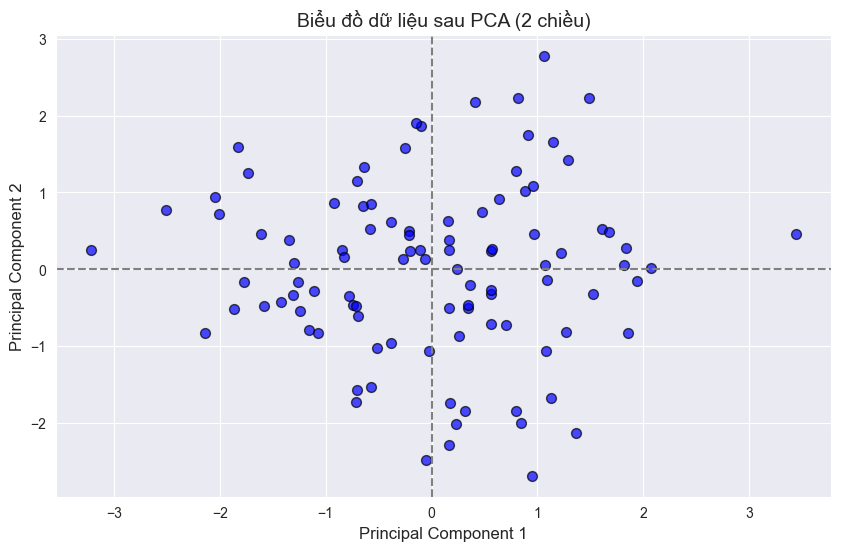

In [64]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=["BEDAYNTM"])
X_scaled = StandardScaler().fit_transform(X)
# PCA: Giảm chiều xuống 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Phân tách thành hai thành phần chính
pc1 = X_pca[:, 0]
pc2 = X_pca[:, 1]
# Vẽ biểu đồ
plot_scatter(pc1, pc2)

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Chia dữ liệu PCA thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X_pca, df["BEDAYNTM"], test_size=0.3, random_state=42)

# Mô hình hồi quy tuyến tính
model_pca = LinearRegression()
model_pca.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred_pca = model_pca.predict(X_test)

# Đánh giá mô hình
mse_pca = mean_squared_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)
print(f"MSE (PCA): {mse_pca:.2f}")
print(f"R² (PCA): {r2_pca:.2f}")


MSE (PCA): 0.15
R² (PCA): 0.12


In [66]:
# Chia dữ liệu nguyên bản thành tập train và test
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_scaled, df["BEDAYNTM"], test_size=0.3, random_state=42)

# Mô hình hồi quy tuyến tính
model_orig = LinearRegression()
model_orig.fit(X_train_orig, y_train_orig)

# Dự đoán trên tập test
y_pred_orig = model_orig.predict(X_test_orig)

# Đánh giá mô hình
mse_orig = mean_squared_error(y_test_orig, y_pred_orig)
r2_orig = r2_score(y_test_orig, y_pred_orig)
print(f"MSE (Nguyên bản): {mse_orig:.2f}")
print(f"R² (Nguyên bản): {r2_orig:.2f}")


MSE (Nguyên bản): 0.16
R² (Nguyên bản): 0.09


## So sanh
### trường hợp dữ liệu nguyên bản
### MSE (Nguyên bản): 0.16
### R² (Nguyên bản): 0.09
### Sau khi giam chieu:
### MSE (PCA): 0.15
### R² (PCA): 0.12
## Ket luan:
### PCA giảm chiều dữ liệu từ nhiều biến về 2 chiều, giúp đơn giản hóa mô hình trong khi vẫn duy trì được tính hiệu quả.
### Kết quả R² và MSE cho thấy việc giảm chiều không làm mất quá nhiều thông tin quan trọng, thậm chí cải thiện một chút khả năng dự đoán của mô hình.




# Ví dụ 4 (Bài tập thực hành 3):

In [105]:
data_path = r"D:\Hoc may\Bài thực hành 4\handwritting"

# Train path
train_images_path = f"{data_path}\\train-images-idx3-ubyte.gz"
train_labels_path = f"{data_path}\\train-labels-idx1-ubyte.gz"

# Test path
test_images_path = f"{data_path}\\t10k-images-idx3-ubyte.gz"
test_labels_path = f"{data_path}\\t10k-labels-idx1-ubyte.gz"


In [106]:
def get_mnist_data(images_path, labels_path, num_images, shuffle=False, image_size=28):
    """Đọc dữ liệu ảnh và nhãn từ file gzip."""
    with gzip.open(images_path, 'rb') as f_images:
        f_images.read(16)  # Bỏ header
        buf_images = f_images.read(image_size * image_size * num_images)
        images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
        images = images.reshape(num_images, image_size, image_size)

    with gzip.open(labels_path, 'rb') as f_labels:
        f_labels.read(8)  # Bỏ header
        labels = np.frombuffer(f_labels.read(num_images), dtype=np.uint8).astype(np.int64)

    if shuffle:
        indices = np.random.permutation(num_images)
        images = images[indices]
        labels = labels[indices]

    images = images.reshape(num_images, image_size * image_size) / 255.0  # Normalization
    return images, labels


# Đọc 5000 ảnh bất kỳ
X, y = get_mnist_data(train_images_path, train_labels_path, 5000, shuffle=True)

# Giảm chiều dữ liệu xuống 100 chiều với PCA
pca = PCA(n_components=100)
X_reduced = pca.fit_transform(X)

# Chia dữ liệu thành train (70%) và validation (30%)
X_train, X_val, y_train, y_val = train_test_split(X_reduced, y, test_size=0.3, random_state=42)
print("Dữ liệu giảm chiều: ", X_train.shape, X_val.shape)

Dữ liệu giảm chiều:  (3500, 100) (1500, 100)


In [111]:
# Huấn luyện và đánh giá mô hình trên dữ liệu gốc (784 chiều)
start_time = time.time()
logreg_original = LogisticRegression(max_iter=5000, multi_class='multinomial', solver='lbfgs')
X_train_original, X_val_original, y_train_original, y_val_original = train_test_split(X, y, test_size=0.3, random_state=42)
logreg_original.fit(X_train_original, y_train_original)
y_pred_original = logreg_original.predict(X_val_original)
original_accuracy = accuracy_score(y_val_original, y_pred_original)
original_time = time.time() - start_time
print(f"Độ chính xác (nguyên bản): {original_accuracy:.4f}, Thời gian: {original_time:.2f}s")

# Huấn luyện và đánh giá mô hình trên dữ liệu đã giảm chiều (100 chiều)
start_time = time.time()
logreg_reduced = LogisticRegression(max_iter=5000, multi_class='multinomial', solver='lbfgs')
logreg_reduced.fit(X_train, y_train)
y_pred_reduced = logreg_reduced.predict(X_val)
reduced_accuracy = accuracy_score(y_val, y_pred_reduced)
reduced_time = time.time() - start_time
print(f"Độ chính xác (giảm chiều): {reduced_accuracy:.4f}, Thời gian: {reduced_time:.2f}s")

Độ chính xác (nguyên bản): 0.8860, Thời gian: 0.56s
Độ chính xác (giảm chiều): 0.8967, Thời gian: 0.13s


In [112]:
# PCA trước khi chia dữ liệu
pca_before_split = PCA(n_components=100)
X_reduced_before_split = pca_before_split.fit_transform(X)

# Chia dữ liệu sau khi giảm chiều
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_reduced_before_split, y, test_size=0.3, random_state=42)
logreg_1 = LogisticRegression(max_iter=5000, multi_class='multinomial', solver='lbfgs')
logreg_1.fit(X_train_1, y_train_1)
accuracy_1 = accuracy_score(y_val_1, logreg_1.predict(X_val_1))
print(f"Độ chính xác (giảm chiều trước): {accuracy_1:.4f}")


Độ chính xác (giảm chiều trước): 0.8913


In [114]:
# Split data into train and validation
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# PCA on training data only, then transform validation data
pca_after_split = PCA(n_components=100)
X_train_2_reduced = pca_after_split.fit_transform(X_train_2)  # Fit PCA on training set
X_val_2_reduced = pca_after_split.transform(X_val_2)  # Apply PCA transformation to validation set

# Multinomial Logistic Regression
logreg_2 = LogisticRegression(max_iter=5000, multi_class='multinomial', solver='lbfgs')
logreg_2.fit(X_train_2_reduced, y_train_2)

# Predict and evaluate
y_pred_2 = logreg_2.predict(X_val_2_reduced)
accuracy_2 = accuracy_score(y_val_2, y_pred_2)

# Output results
print(f"Độ chính xác (giảm chiều sau): {accuracy_2:.4f}")


Độ chính xác (giảm chiều sau): 0.9087


## Nhan xet :
### Dữ liệu nguyên bản (784 chiều): Thời gian chạy thường lâu hơn do dữ liệu có nhiều chiều, nhưng độ chính xác có thể cao hơn nếu tất cả các chiều đều quan trọng.

### Dữ liệu giảm chiều (100 chiều): Thời gian chạy nhanh hơn và độ chính xác phụ thuộc vào việc PCA có giữ được thông tin quan trọng hay không.